In [23]:
import tensorflow as tf
import cv2 as cv, os
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Configure and Load Data

In [44]:
cam_num = '3367'
model_ver = '5'

In [45]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1080 files belonging to 2 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [47]:
batch = data_iterator.next()

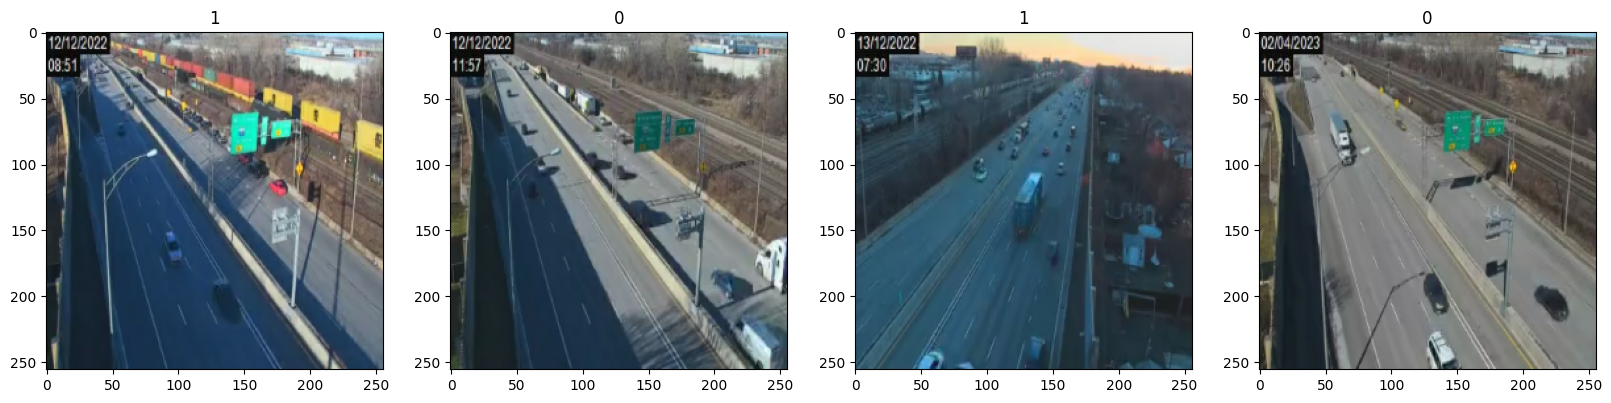

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [49]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [50]:
# access iterator and show next batch
scaled_iterator = scaled_data.as_numpy_iterator()

In [51]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)+1
test_size = int(len(scaled_data)*.1)+1

In [52]:
#establish partitions
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Build and train Model

In [53]:
#Sequential is good when we habe one input and one output; the layers below are used to build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
#instatiate model
model = Sequential()

In [55]:
# sequential adding layers, "architectural decisions..."
# add a convolutional layer (input layer), with 16 filters (to condense image), 3 by 3 pixels in size, stride of 1 (move by 1 px), 'relu' is the activation, suppressing negative values, in
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# MapPooling is reducing data be taking maximas
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Reduce channel values
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
# Reduce to one single output = 0 or 1 = train or no train
model.add(Dense(1, activation='sigmoid'))

In [56]:
# adam = name of optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [57]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 50s 2s/step - loss: 0.6708 - accuracy: 0.6440 - val_loss: 0.4901 - val_accuracy: 0.7991
Epoch 2/20
23/23 [==============================] - 49s 2s/step - loss: 0.4387 - accuracy: 0.8370 - val_loss: 0.4399 - val_accuracy: 0.8214
Epoch 3/20
23/23 [==============================] - 47s 2s/step - loss: 0.3606 - accuracy: 0.8614 - val_loss: 0.3659 - val_accuracy: 0.8482
Epoch 4/20
23/23 [==============================] - 44s 2s/step - loss: 0.2879 - accuracy: 0.9022 - val_loss: 0.2977 - val_accuracy: 0.8839
Epoch 5/20
23/23 [==============================] - 41s 2s/step - loss: 0.2386 - accuracy: 0.9226 - val_loss: 0.1990 - val_accuracy: 0.9286
Epoch 6/20
23/23 [==============================] - 40s 2s/step - loss: 0.1697 - accuracy: 0.9484 - val_loss: 0.1575 - val_accuracy: 0.9330
Epoch 7/20
23/23 [==============================] - 37s 2s/step - loss: 0.1188 - accuracy: 0.9565 - val_loss: 0.1690 - val_accuracy: 0.9286
Epoch 8/20
23/23 [==

## Plot Performance

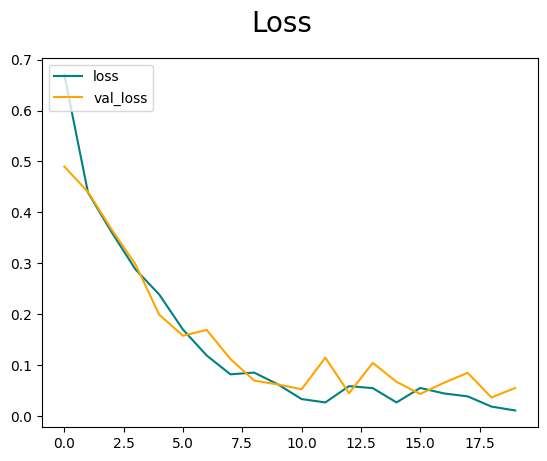

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

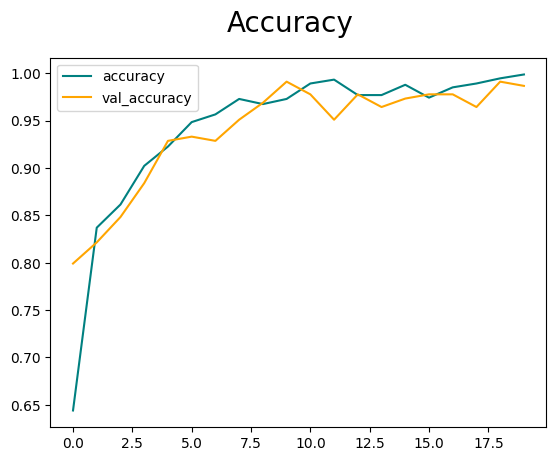

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Saving the model

In [62]:
file_name = f'cam{cam_num}_model_v{model_ver}.h5'
model.save(os.path.join('models', file_name))
file_name

'cam3367_model_v5.h5'